In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#df = pd.read_csv('/Users/coady/Data_Tools_Brazil_Weather/sudeste.csv')

In [3]:
#df.to_hdf('weather.hdf','mydata',mode='w')

In [2]:
df = pd.read_hdf('weather.hdf','mydata')

In [3]:
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)

In [4]:
d = {}
for col in df:
    d[col] = df[col].unique().tolist()

In [21]:
#print(d['temp'])

In [5]:
df.shape

(9779168, 30)

In [6]:
print(df.isna().sum())

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64


Some stations do not have wind or rain sensors, owing to why there are so many Null values. Will set them to zero to be able to do cleanup, then separate stations to do individual analysis

Gbrd has null values for when the sun is down (little less than half the time which makes sense). Make these zero values also to not affect analysis.

Other column null values we can set to zero and interpolate to get a value.

- Separate data for each station
- Each station may have it's own issues for data cleanup, so we separate and apply a cleanup function for each

In [7]:
df['prcp'].fillna(0,inplace=True)

In [8]:
df['gbrd'].fillna(0,inplace=True)

In [33]:
#df.fillna(0,inplace=True)

In [9]:
df.isna().sum()

wsid         0
wsnm         0
elvt         0
lat          0
lon          0
inme         0
city         0
prov         0
date         0
yr           0
mo           0
da           0
hr           0
prcp         0
stp          0
smax         0
smin         0
gbrd         0
temp        31
dewp       475
tmax        26
dmax       310
tmin        34
dmin       807
hmdy         0
hmax        12
hmin        44
wdsp    925561
wdct         0
gust    316474
dtype: int64

In [10]:
(df == 0).astype(int).sum(axis=0)

wsid          0
wsnm          0
elvt      71760
lat       71760
lon       71760
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr       407466
prcp    9117863
stp      701723
smax     705438
smin     705358
gbrd    4988310
temp     628611
dewp     705849
tmax     631473
dmax     706613
tmin     631410
dmin     714946
hmdy     679673
hmax     677458
hmin     684793
wdsp     828184
wdct     870382
gust     841180
dtype: int64

Drop where all sensor columns are 0

In [10]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']
df = df[(df[col] != 0).any(axis=1)]


In [11]:
df.shape

(9159199, 30)

9779168 - 9159199 = 619969 columns dropped

take care of all but wind data. Look closer into wind data issues

In [12]:
df['temp'].replace(0, np.nan, inplace=True)
df['temp'].interpolate('linear', inplace=True, limit_direction='both')
df['dewp'].replace(0, np.nan, inplace=True)
df['dewp'].interpolate('linear', inplace=True, limit_direction='both')
df['tmax'].replace(0, np.nan, inplace=True)
df['tmax'].interpolate('linear', inplace=True, limit_direction='both')
df['tmin'].replace(0, np.nan, inplace=True)
df['tmin'].interpolate('linear', inplace=True, limit_direction='both')
df['dmax'].replace(0, np.nan, inplace=True)
df['dmax'].interpolate('linear', inplace=True, limit_direction='both')
df['dmin'].replace(0, np.nan, inplace=True)
df['dmin'].interpolate('linear', inplace=True, limit_direction='both')
df['hmax'].replace(0, np.nan, inplace=True)
df['hmax'].interpolate('linear', inplace=True, limit_direction='both')
df['hmin'].replace(0, np.nan, inplace=True)
df['hmin'].interpolate('linear', inplace=True, limit_direction='both')

In [13]:
df['wdsp'].interpolate('linear', inplace=True,limit_direction='both')
df['gust'].interpolate('linear', inplace=True,limit_direction='both')

In [14]:
df.isna().sum()

wsid    0
wsnm    0
elvt    0
lat     0
lon     0
inme    0
city    0
prov    0
date    0
yr      0
mo      0
da      0
hr      0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

Count number of nonzeros in each column

In [12]:
df.astype(bool).sum(axis=0)

wsid    9779168
wsnm    9779168
elvt    9707408
lat     9707408
lon     9707408
inme    9779168
city    9779168
prov    9779168
date    9779168
yr      9779168
mo      9779168
da      9779168
hr      9371702
prcp     661305
stp     9077445
smax    9073730
smin    9073810
gbrd    4790858
temp    9150557
dewp    9073319
tmax    9147695
dmax    9072555
tmin    9147758
dmin    9064222
hmdy    9099495
hmax    9101710
hmin    9094375
wdsp    8877649
wdct    8908786
gust    8906333
dtype: int64

Count number of zeros in each column

In [15]:
(df == 0).astype(int).sum(axis=0)

wsid          0
wsnm          0
elvt      39710
lat       39710
lon       39710
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr       380996
prcp    8497894
stp       81754
smax      85469
smin      85389
gbrd    4368341
temp          2
dewp         23
tmax          3
dmax         15
tmin          4
dmin         24
hmdy      59704
hmax          0
hmin          0
wdsp     210341
wdct     250413
gust     222488
dtype: int64

In [16]:
df['hmdy'].replace(0, np.nan, inplace=True)
df['hmdy'].interpolate('time', inplace=True, limit_direction='both')

look into why elevation, lat, lon is zero (all same weather station?), same with smin, smax etc, and look at surrornding values to see if it makes sense

hr, prcp, and gbrd are ok to be 0

https://stackoverflow.com/questions/40660088/get-first-row-of-dataframe-in-python-pandas-based-on-criteria

then work on wind stuff to clean that data up

In [17]:
df.to_hdf('cleaning_up_df.hdf','mydata',mode='w')

In [18]:
df = pd.read_hdf('cleaning_up_df.hdf','mydata')

In [19]:
df[df.elvt == 0].index[0]

Timestamp('2008-07-25 18:00:00')

In [20]:
df[df.elvt == 0].head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
mdct,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-25 18:00:00,418,MOELA,0.0,0.0,0.0,ZZZ3,Guarujá,SP,2008-07-25,2008,7,25,18,0.0,1014.3,1014.3,1014.0,426.700,20.0,16.0,20.2,16.9,19.8,15.8,78.0,83.0,76.0,3.3,242.0,7.2
2008-07-25 19:00:00,418,MOELA,0.0,0.0,0.0,ZZZ3,Guarujá,SP,2008-07-25,2008,7,25,19,0.0,1014.8,1014.8,1014.2,167.094,19.9,15.3,20.0,16.3,19.8,15.3,75.0,80.0,75.0,2.5,239.0,7.4
2008-07-25 20:00:00,418,MOELA,0.0,0.0,0.0,ZZZ3,Guarujá,SP,2008-07-25,2008,7,25,20,0.0,1015.2,1015.2,1014.8,95.589,19.6,15.4,19.9,15.7,19.5,15.2,77.0,78.0,74.0,2.8,222.0,6.8
2008-07-25 21:00:00,418,MOELA,0.0,0.0,0.0,ZZZ3,Guarujá,SP,2008-07-25,2008,7,25,21,0.0,1015.8,1015.8,1015.2,12.199,19.3,15.4,19.6,15.9,19.2,15.2,78.0,80.0,77.0,1.9,276.0,8.0
2008-07-25 22:00:00,418,MOELA,0.0,0.0,0.0,ZZZ3,Guarujá,SP,2008-07-25,2008,7,25,22,0.0,1016.7,1016.7,1015.8,0.000,19.2,14.0,19.3,15.5,19.2,13.7,72.0,79.0,70.0,4.0,94.0,8.4


This explains the 0 values. Maybe the metadata for the station did not get input correctly? Let's go to the internet and see what the average lat/lon and elevation is for Guarujá

https://en.wikipedia.org/wiki/Guaruj%C3%A1

It is a very small area (55 sq miles)
Elevation is 4 meters
lat lon is 23°59′37″S 46°15′23″W --> lat -23.993611, lon -46.256389
We can change this in our dataset to get a more accurate description

In [21]:
df['elvt'].replace(0, 4, inplace=True)
df['lat'].replace(0, -23.993611, inplace=True)
df['lon'].replace(0, -46.256389, inplace=True)

Let's look at what needs cleaning next

In [18]:
(df == 0).astype(int).sum(axis=0)

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr       407466
prcp    9117863
stp      701723
smax     705438
smin     705358
gbrd    4988310
temp     628611
dewp     705849
tmax     631473
dmax     706613
tmin     631410
dmin     714946
hmdy          0
hmax     677458
hmin     684793
wdsp     901519
wdct     870382
gust     872835
dtype: int64

Let's look at stp. It looks like a bunch of the stations just use the same Smax value as they do for stp...

In [19]:
stp_smax_equal = df[df['stp'] == df['smax']].count().stp
stp_smax_equal

4272494

3652525/9159199 = 0.398, so about 40% of the data has this issue... Does this warrant dropping one of the columns? Or is smax a good enough 

Uhoh, then the other 40% has stp = smin

In [20]:
stp_smin_equal = df[df['stp'] == df['smin']].count().stp
stp_smin_equal

4078127

What about when smax = smin?

In [17]:
smax_smin_equal = df[df['smax'] == df['smin']].count().stp
smax_smin_equal

92853

9159199 - (3652525 + 3458158 + 92853) = 1955663 rows have independent values for all 3.

In [3]:
1955663/9159199

0.21351899876834207

How much of our analysis do we want to use stp, smin, smax? Or drop? Or go thru for each station to see the issues and cleanup individually?

In [42]:
df['stp'].replace(0, np.nan, inplace=True)
df['stp'].interpolate('linear', inplace=True, limit_direction='both')
df['smax'].replace(0, np.nan, inplace=True)
df['smax'].interpolate('linear', inplace=True, limit_direction='both')
df['smin'].replace(0, np.nan, inplace=True)
df['smin'].interpolate('linear', inplace=True, limit_direction='both')

In [43]:
station_384_tail_365.head(400)

,mdct,wsid,wsnm,elvt,lat,lon,inme,city,prov,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,2016-09-15 19:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,19,NaN,1012.700000,1012.700000,1011.700000,1131.838,24.1,14.7,25.1,14.7,24.1,11.5,56.0,56.0,49.0,3.7,251.0,9.3
1,2016-09-15 20:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,20,NaN,1013.400000,1013.400000,1012.700000,541.710,23.4,15.5,24.3,15.6,23.3,14.4,61.0,61.0,57.0,3.5,254.0,8.3
2,2016-09-15 21:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,21,NaN,1014.300000,1014.300000,1013.400000,87.492,22.8,15.7,23.5,16.0,22.7,15.0,65.0,65.0,64.0,2.7,251.0,7.5
3,2016-09-15 22:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,22,NaN,1015.000000,1015.000000,1014.300000,NaN,22.5,14.9,22.8,15.7,22.5,14.8,62.0,65.0,62.0,2.2,263.0,6.2
4,2016-09-15 23:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,23,NaN,1016.000000,1016.000000,1015.000000,NaN,22.4,14.8,22.6,15.0,22.3,14.6,62.0,63.0,62.0,1.6,257.0,4.5
5,2016-09-16 00:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,0,NaN,1016.500000,1016.500000,1016.000000,NaN,22.3,15.6,22.4,15.6,22.2,14.7,66.0,66.0,65.0,2.1,263.0,4.7
6,2016-09-16 01:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,1,NaN,1016.800000,1016.800000,1016.500000,NaN,22.2,15.3,22.3,15.7,22.1,15.2,65.0,66.0,65.0,1.1,264.0,4.0
7,2016-09-16 02:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,2,NaN,1016.700000,1016.900000,1016.700000,NaN,22.2,15.8,22.2,15.8,22.1,15.3,67.0,67.0,67.0,0.6,217.0,3.1
8,2016-09-16 03:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,3,NaN,1016.400000,1016.700000,1016.500000,NaN,21.9,16.2,22.2,16.2,21.9,15.7,70.0,70.0,68.0,1.4,257.0,3.0
9,2016-09-16 04:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,4,NaN,1016.000000,1016.500000,1016.000000,NaN,21.9,15.8,22.0,16.3,21.8,15.8,69.0,70.0,69.0,1.5,237.0,3.4


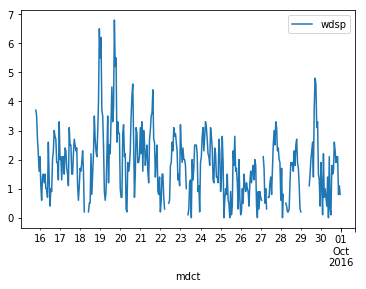

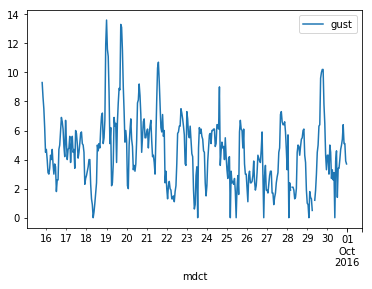

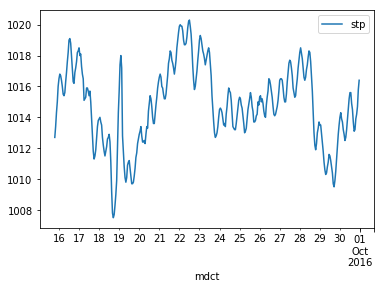

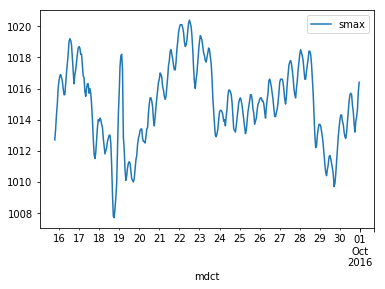

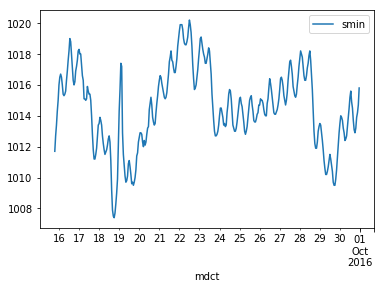

In [46]:
# check 2 week period for sample station(384)
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()


station_384_tail_365.plot(x='mdct', y='wdsp')
#station_384_tail_365.plot(x='mdct', y='wdct')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')




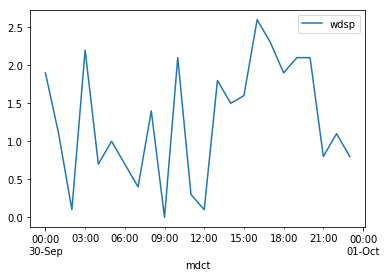

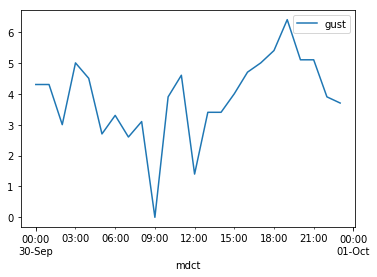

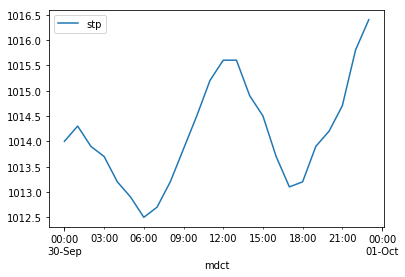

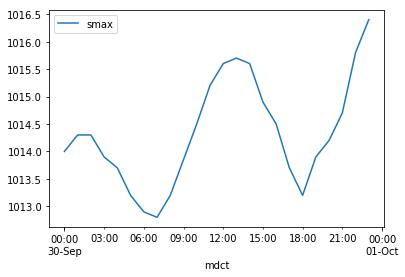

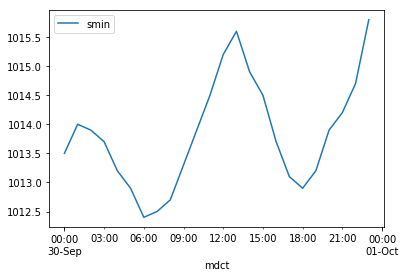

In [50]:
# check 2 week period for sample station(384)
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(24)
station_384_tail_365 = station_384_tail_365.reset_index()

station_384_tail_365.plot(x='mdct', y='wdsp')
#station_384_tail_365.plot(x='mdct', y='wdct')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')

In [49]:
df[df.wdct == 0].head(300)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
mdct,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-11-06 11:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06,2007,11,6,11,0.0,986.900000,987.150000,986.525000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-06 12:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06,2007,11,6,12,0.0,986.600000,987.100000,986.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-06 13:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06,2007,11,6,13,0.0,986.300000,987.050000,986.175000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-14 01:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,1,0.0,984.470000,984.470000,983.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-14 02:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,2,0.0,984.740000,984.740000,983.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-14 03:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,3,0.0,985.010000,985.010000,984.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-14 04:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,4,0.0,985.280000,985.280000,984.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-14 05:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,5,0.0,985.550000,985.550000,984.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-14 06:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,6,0.0,985.820000,985.820000,985.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Looks like some stations (178) did not capture wind gust data, though they have wind direction and speed. Then some stations do not capture all 3 measurements

In [25]:
df[df.gust == 0].head(300)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
mdct,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-11-06 09:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06,2007,11,6,9,0.0,986.7,986.7,985.7,214.149,22.9,18.3,22.9,18.3,18.2,17.100000,75.0,94.0,75.0,0.0,248.0,0.0
2007-11-14 10:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14,2007,11,14,10,0.0,986.9,986.9,986.6,884.623,26.2,17.9,26.4,18.0,23.9,17.500000,60.0,69.0,59.0,3.1,109.0,0.0
2007-11-17 10:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-17,2007,11,17,10,0.0,986.9,986.9,986.4,850.989,26.4,16.9,26.9,17.3,25.5,16.800000,56.0,59.0,55.0,4.5,139.0,0.0
2007-11-18 10:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-18,2007,11,18,10,0.0,986.6,986.6,985.9,800.069,25.7,17.6,26.0,17.8,24.7,17.400000,61.0,65.0,60.0,3.5,141.0,0.0
2007-11-21 10:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-21,2007,11,21,10,0.0,986.6,986.7,986.3,833.818,26.9,19.4,26.9,20.1,25.3,19.400000,64.0,72.0,64.0,2.7,90.0,0.0
2007-11-22 10:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-22,2007,11,22,10,0.0,987.0,987.0,986.6,809.446,26.1,18.3,26.5,18.5,25.5,17.900000,62.0,64.0,60.0,4.0,105.0,0.0
2007-11-22 22:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-22,2007,11,22,22,0.0,982.6,982.6,982.1,0.000,24.6,20.4,26.3,21.0,24.6,19.900000,78.0,80.0,68.0,0.0,141.0,0.0
2007-11-23 22:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-23,2007,11,23,22,0.0,982.2,982.2,981.3,0.000,25.9,22.1,27.4,22.4,25.8,20.900000,80.0,80.0,69.0,0.0,137.0,0.0
2007-11-26 10:00:00,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-26,2007,11,26,10,0.0,985.5,985.5,985.0,822.372,26.0,17.3,26.0,18.0,24.7,17.200000,59.0,67.0,59.0,2.9,107.0,0.0


In [31]:
len(df.city.unique())

117

Split station and data and store in a dict. Then we can individually clean each set?

In [26]:
individual_stations = {}
for each in df.wsid.unique():
    is_ = df['wsid'] == each
    k = str(each)
    individual_stations[k] = df[is_]

In [27]:
individual_stations.keys()

dict_keys(['178', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423'])